In this notebook I covered basic Statistics using Titanic dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
df = pd.read_csv('../input/titanic/train.csv')
dt =  pd.read_csv('../input/titanic/test.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#   Measure of Centres
1. Mean
2. Median
3. Mode




# Mean

  In mathematics and statistics, the arithmetic mean, or simply the mean or the average, is the sum of a collection of numbers divided by the count of numbers in the collection
  



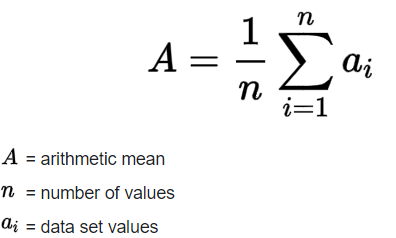

Now we will calculate the Mean of the Age and Fare from the above titanic data set using python

In [4]:

mean_age = np.mean(df['Age'])
mean_age

29.69911764705882

from the above calcualation we undersand the average age of the person on the ship is 29 years.

In [5]:
mean_fare = np.mean(df['Fare'])
mean_fare

32.2042079685746

# Mode

A mode, in statistics, is defined as the value that has higher frequency in a given set of values. It is the value that appears the most number of times. In general mode is calculated for categorical values in the dataset.

now we will calculate the mode of categorical values in the dataset and try to understand the data more in depth.

In [6]:
mode_c = statistics.mode(df['Embarked'])
mode_c

'S'

from the above calculation we understand that in the column called  "Embarked" the most frequent value repeated is "S" we have only 3 entities are there in the column  ie S , C and Q and the mode of the column is "S"

# median

The median is the middle number in a sorted, ascending or descending, list of numbers and can be more descriptive of that data set than the average. The median is sometimes used as opposed to the mean when there are outliers in the sequence that might skew the average of the values.


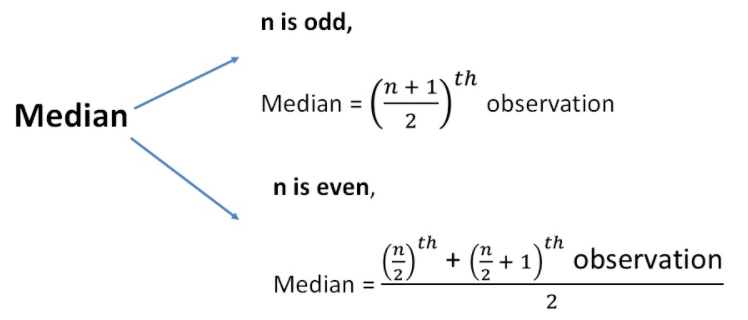

Lets calculate the median of Age and Fare in the dataset

In [7]:
df = df.dropna()
median_age = np.median(df['Age'])
median_age

36.0

# Observations 

1.Please observer the Mean and Median of Age column , both are not same, mean is less than median.
2. The distribution of Age column data is right skewed.


please see the below plot.


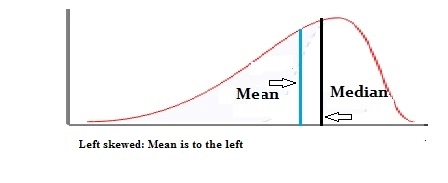

# MEASURE OF SPREAD


Measures of spread describe how similar or varied the set of observed values are for a particular variable (data item). Measures of spread include the range, quartiles and the interquartile range, variance and standard deviation.

1. Variance
2. Standard Deviation
3. Mean absolute deviation
4. Quantile
5. Inter Quantile Range
6. Outliners


# Variance

The variance is a measure of variability. It is calculated by taking the average of squared deviations from the mean. Variance tells you the degree of spread in your data set. The more spread the data, the larger the variance is in relation to the mean.

# Formula for Variance

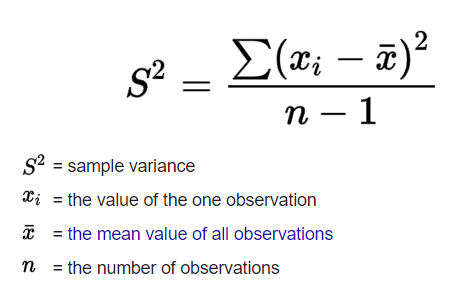

# Distribution of Variance

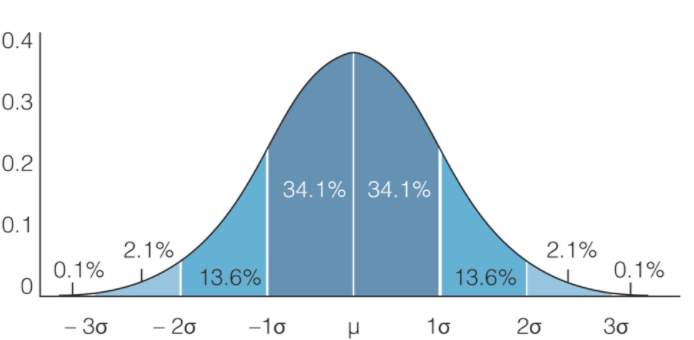

now we will calculate the variance of numerical columns like Age and Fare 

In [8]:
var_age = np.var(df['Age'])
var_age

243.39321702051421

In [9]:
var_fare = np.std(df['Fare'])
var_fare

76.13895628242061

# Standard Deviation

in statistics, the standard deviation is a measure of the amount of variation or dispersion of a set of values. A low standard deviation indicates that the values tend to be close to the mean of the set, while a high standard deviation indicates that the values are spread out over a wider range.

it is the square root of the Variance.

formula for Standard Deviation:

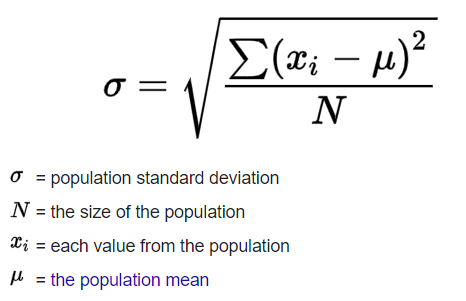

Now we will calculate the Standard Deviation for Age and Fare.

In [10]:
age_std = np.std(df['Age'])
age_std

15.601064611766539

In [11]:
Fare_std = np.std(df['Fare'])
Fare_std

76.13895628242061

#Quantile

A quantile defines a particular part of a data set, i.e. a quantile determines how many values in a distribution are above or below a certain limit. Special quantiles are the quartile (quarter), the quintile (fifth) and percentiles (hundredth).

  

# calculating the quantile

In [12]:
s = np.quantile(df['Age'],[0,.25,.5,.75,1])
s

array([ 0.92, 24.  , 36.  , 47.5 , 80.  ])

see the above formula. we passed the parameters in the list. we divided the data into 4 equal parts. ie
* 0-25%
* 25-50%
* 50-75%
* 75-100%

now see the result set

This means 
  the age of  first 25% of the data is between 1 to 24 years
  
  the age of  second 25% of the data is between 24 to 36 years
  
  the age of  third 25% of the data is between 36 to 48 years
  
  the age of fourth  25% of the data is between 48 to 80 years



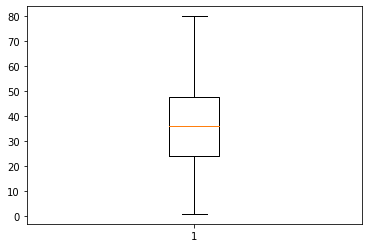

In [13]:
plt.boxplot(df['Age'])
plt.show()

See the above plot.  The bottom of the box if first quantile and top of the box in 3rd quantile. the middle line is 2nd quantile or median.

# IQR -( Interquartile Range)

It is the difference between 25th and 75th percentile ,which is also the height of the box in boxplot.
we can calcualte the IQR using the below function



we can calculate the IQR by quantile function (by taking the difference of 75% and 25%) or IQR function

Quantile method as below:

IQR Function as below:

In [14]:
np.quantile(df['Age'],.75) - np.quantile(df['Age'],.25)

23.5

In [15]:
from scipy.stats import iqr
iqr(df['Age'])

23.5

# Outliners: 

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.

how to  calculate the Outlines:

data < 1st quantile(Q1) - 1.5*IQR  (lower threshold)

or 

data > 3rd quantile(Q3) + 1.5*IQR. (upper threshold)

Now we will calculate the outlines for Age in the give dataset using above logic.

In [16]:
from scipy.stats import iqr
iqr =iqr(df['Age'])
lower_threshold = np.quantile(df['Age'],.25) - 1.5*iqr
upper_threshold = np.quantile(df['Age'],.75) + 1.5*iqr
df[(df['Age']< lower_threshold) | (df['Age']>upper_threshold)]



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# Observations:
we dont have any outliners for Age column

In [17]:
from scipy.stats import iqr
iqr =iqr(df['Fare'])
lower_threshold = np.quantile(df['Fare'],.25) - 1.5*iqr
upper_threshold = np.quantile(df['Fare'],.75) + 1.5*iqr
df[(df['Fare']< lower_threshold) | (df['Fare']>upper_threshold)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
689,690,1,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,24160,211.3375,B5,S


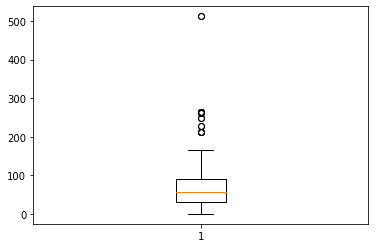

In [18]:
plt.boxplot(df['Fare'])
plt.show()

# Observations
see the above plot we have some outliners in the column Fare.Outlines in the plot are the data points which are outside of the box in the boxplot.

# Normal Distribution

Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. In graph form, normal distribution will appear as a bell curve.



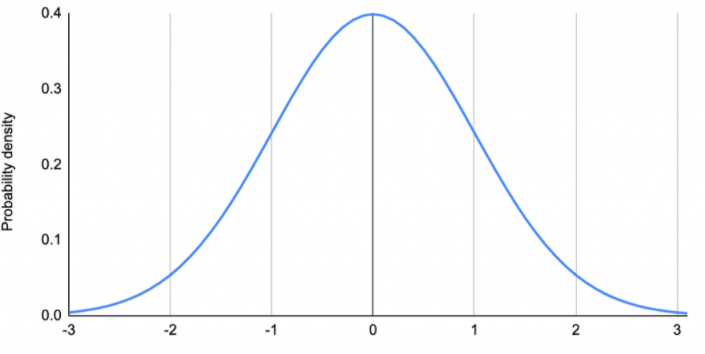

# Features of Normal Distribution

1.The curve is symmetric at the center (i.e. around the mean, μ).
2. Area under the curve =1
3.Curve never hits 0 
4.bell shaped at the cnetre
5. 68% of the area falls under 1 standard deviation.
6. 95% of the area falls under 2 standard deviation.
7. 99% of the area falls under 3 standard deviation.



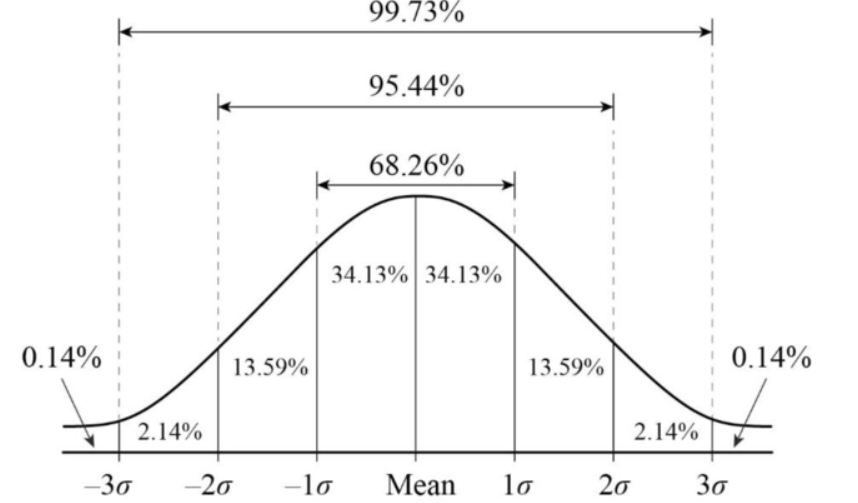

Distribution of Age and Fare from the dataset.

Age:

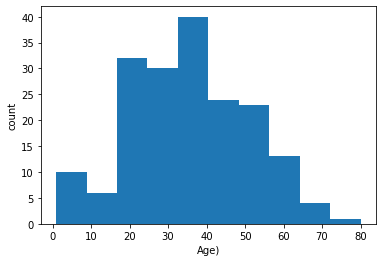

In [20]:
plt.hist(df['Age'])
plt.xlabel('Age)')
plt.ylabel('count')
plt.show()

Age column from the dateset is almost resembles Normal distribution.

Now we will take this as a normal distribution we know the mean and Standard Deviation of the Age column

Mean = 29

Standard Deviation = 15.

now we will calculate what percent of people fall into different Age ranges groups


Now we will find our what percent of people are younger than 20 year old from the given dataset.

note: in the below formula we pass the 3 parameters ,

1st parameter = 20 (what percent of people are younger than 20 years)

2nd Parameter = 29 (mean of the Age column)

3rd parameter = 15 (standard deviation)








In [21]:
from scipy.stats import norm
norm.cdf(20,29,15)


0.2742531177500736

so  27 % of people in the ship are under 20 year old

Now we will try to find what percent of people are younger than 29 which is mean itself

In [22]:
from scipy.stats import norm
norm.cdf(29,29,15)

0.5

As expected , since 29 is mean so 50% of people are younger than 29 years in the ship.

# Data distribution of "Fare" from the dataset

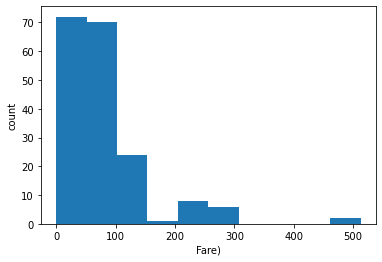

In [23]:
plt.hist(df['Fare'])
plt.xlabel('Fare)')
plt.ylabel('count')
plt.show()

the data distribution of Fare column is left skewed distribution since its not symentrical and the median

In [24]:
median_Fare = np.median(df['Fare'])
median_Fare

57.0

In [25]:
np.mean(df['Fare'])

78.68246885245901

# Central Limit Theorem

central limit theorem, which states that a sampling distribution will approach a normal distribution as the number of trials increases , as the sample size becomes larger, assuming that all samples are identical in size, and regardless of the population distribution shape.


now we will see it practically how it will happen. we will take a simple sample with less number of trial and we will keep on increase the no of trials and we will find that as the more number of trials increase the sample distribution will tend to achieve the normal distribution.



# Rolling a dice multiple times and take the mean each time

Assume that we have a dice with number (1 to 6) and we roll the dice 5 , 10 ,100, 1000 times and take the mean. we will observe that the number of trials we increase the sampling the graph resemble more to normal distribution.

First trial 5 times

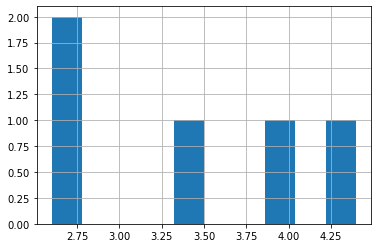

In [26]:

dice = pd.Series([1,2,3,4,5,6])

samp_mean = []

for i in range(5):
    samp = dice.sample(5,replace = True)
    samp_mean.append(np.mean(samp))    
#print(samp_mean)
samp_mean = pd.Series(samp_mean)
samp_mean.hist()
plt.show()

Second trial 10 times

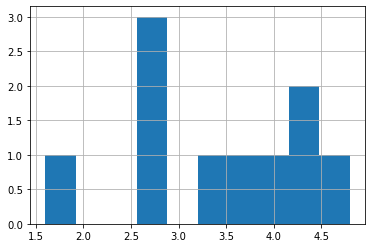

In [27]:

dice = pd.Series([1,2,3,4,5,6])

samp_mean = []

for i in range(10):
    samp = dice.sample(5,replace = True)
    samp_mean.append(np.mean(samp))    
#print(samp_mean)
samp_mean = pd.Series(samp_mean)
samp_mean.hist()
plt.show()

third trial 100 times

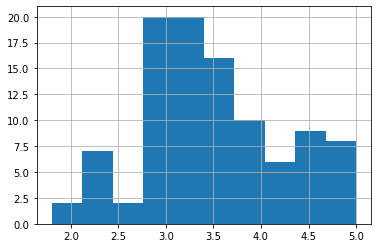

In [28]:

dice = pd.Series([1,2,3,4,5,6])

samp_mean = []

for i in range(100):
    samp = dice.sample(5,replace = True)
    samp_mean.append(np.mean(samp))    
#print(samp_mean)
samp_mean = pd.Series(samp_mean)
samp_mean.hist()
plt.show()

fourth trial 1000 times

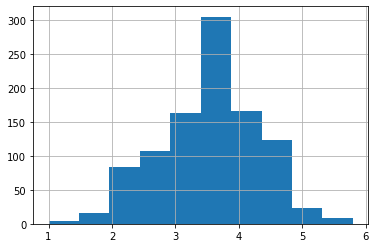

In [30]:

dice = pd.Series([1,2,3,4,5,6])

samp_mean = []

for i in range(1000):
    samp = dice.sample(5,replace = True)
    samp_mean.append(np.mean(samp))    
#print(samp_mean)
samp_mean = pd.Series(samp_mean)
samp_mean.hist()
plt.show()

# Observations:

we have seen as the number of trials increased for any sampling distributions then the distribution resembles the normal distribution.

 if you like the notebook please give thumbs up.